In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.
Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [ ]:
import pandas as pd

df = pd.read_csv(path + "/spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns = {"v1": "label", "v2": "message"}, inplace = True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import re

def clean(text):
  text = text.lower()
  text = re.sub(r"^a-z0-9\s", "", text)
  return text
df["clean_mesaage"] = df["message"].apply(clean)
df.head()

,label,message,clean_mesaage
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


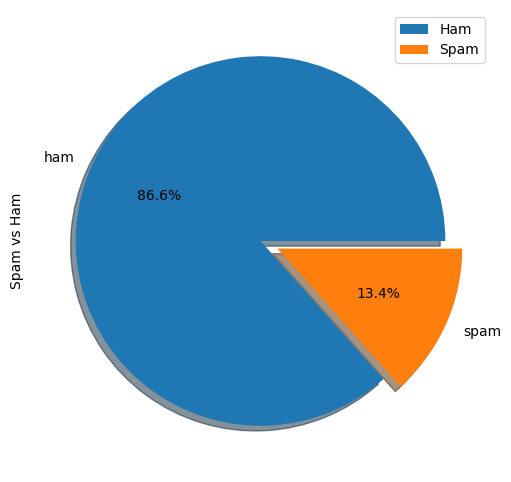

In [ ]:
import matplotlib.pyplot as plt

df["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Using BoW (Bag of Words) Vectoriztion
BoW_vec = CountVectorizer(max_features = 2500)
x_bow = BoW_vec.fit_transform(df["clean_mesaage"])
xbow_shape = x_bow.shape
print("Shape of BoW vectorized data:", xbow_shape)
print(BoW_vec.get_feature_names_out()[:10])

print("----------------------------------")

#Using TF-IDF
TFIDF = TfidfVectorizer(max_features = 2500)
x_tfidf = TFIDF.fit_transform(df["clean_mesaage"])
xtfidf = x_tfidf.shape
print("Shape of TF-IDF vectorized data:",xtfidf)
print(TFIDF.get_feature_names_out()[:10])

Shape of BoW vectorized data: (5572, 2500)
['00' '000' '02' '03' '04' '05' '06' '07xxxxxxxxx' '0800' '08000839402']
----------------------------------
Shape of TF-IDF vectorized data: (5572, 2500)
['00' '000' '02' '03' '04' '05' '06' '07xxxxxxxxx' '0800' '08000839402']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df["label"])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state = 42 )

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(class_weight = "balanced")
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9775784753363229
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.92      0.91      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
import joblib

joblib.dump(lr, "spam_detection.pkl")
joblib.dump(BoW_vec, "BoW_vectorizer.pkl")

['BoW_vectorizer.pkl']